### 2. 特征工程
#### 2.1 什么是特征工程
#### 2.2 特征理解
#### 2.3 特征增强（数据清洗）
根据自己对数据的理解，进行数据的修改，但是不删除或插入新的属性。
-    对非结构化数据进行结构化
-    数据缺失的填充
-    数据冗余的删除
-    数据错误的修正
-    数据归一化：标准化、极差法、L1和L2正则化(regularization)

In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
code_Dict = {'阿里巴巴': 'BABA', '京东': 'JD', '沃尔玛': 'WMT', '亚马逊': 'AMzN', '易贝': 'EBAY'}
start_date = '2020-01-01'
end_date = '2022-03-20'

babaDf = data.get_data_yahoo(code_Dict['阿里巴巴'], start_date, end_date)
babaDf.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,213.639999,210.729996,212.000000,212.100006,6773600,212.100006
2020-01-02,219.979996,216.539993,216.600006,219.770004,15873500,219.770004
2020-01-03,218.203003,216.009995,216.350006,217.000000,8604500,217.000000
2020-01-06,217.160004,214.089996,214.889999,216.639999,11885500,216.639999
2020-01-07,218.940002,216.690002,217.639999,217.630005,9388000,217.630005


In [3]:
# After normalization, the data follows a normal distribution
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
from sklearn.preprocessing import MinMaxScaler
# Default: feature_range=(0, 1)
# Documentaion: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [4]:
# Close Price
originData = babaDf.iloc[:, 3:4].astype('float32')
scaler = MinMaxScaler()
# Compute the minimum and maximum to be used for later scaling.
scaler.fit(originData)
# Scale features of X according to feature_range.
returnData = scaler.transform(originData)

# fit_transform(X[, Y]) => Fit to data, then transform it.
df_log = pd.DataFrame(returnData)
df_log.head(5)

,0
0,0.563025
1,0.594933
2,0.583410
3,0.581912
4,0.586030


#### 2.4 特征选择
数据属性在什么情况下才能成为真正的特征？

研究一些统计和迭代过程
- 相关系数
- 识别并移除多重共线性
- 卡方检验
- 方差分析
- 理解p值
- 迭代特征选择
- 用机器学习测量熵和信息增益

注意与降维技术的区别

#### 2.5 特征构建
为数据集插入新的特征
- 基于业务背景构建更能表达问题的特征（价格单日变化幅度、单周成交量）---- 基于统计信息
- 模型可以有效利用的特征：常见的有one-hot编码、{0，1}
- 实体匹配（淘宝销量预测时利用客户京东购物数据）
- 空间投影（价格单日变化幅度-->某个空间（市场情绪、政策影响）） ---- 领域知识（GNN、NLP）

场景：事件/趋势相似性发现

图相似度搜索：常用图编辑距离或者最大共同子图来衡量图的相似度，然而这两个指标的计算复杂度非常高（NP-complete）。

In [5]:
babaDf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,213.639999,210.729996,212.000000,212.100006,6773600,212.100006
2020-01-02,219.979996,216.539993,216.600006,219.770004,15873500,219.770004
2020-01-03,218.203003,216.009995,216.350006,217.000000,8604500,217.000000
2020-01-06,217.160004,214.089996,214.889999,216.639999,11885500,216.639999
2020-01-07,218.940002,216.690002,217.639999,217.630005,9388000,217.630005
...,...,...,...,...,...,...
2022-03-14,82.449997,77.080002,80.699997,77.760002,69992600,77.760002
2022-03-15,80.139999,73.279999,75.099998,76.760002,86209300,76.760002
2022-03-16,105.739998,87.120003,92.000000,104.980003,159834300,104.980003


In [6]:
# Feature Engineering
def change(column):
    res = [0]
    buyPrice = column[0]
    print(len(column))
    for i in range(1, len(column)):
        res.append((column[i] - buyPrice) / buyPrice)
    return res

closeCol = babaDf['Close']
# New Feature 
babaChange = change(closeCol)

559


In [7]:
babaDf['cumulativeChange'] = babaChange
babaDf

,High,Low,Open,Close,Volume,Adj Close,cumulativeChange
Date,,,,,,,
2019-12-31,213.639999,210.729996,212.000000,212.100006,6773600,212.100006,0.000000
2020-01-02,219.979996,216.539993,216.600006,219.770004,15873500,219.770004,0.036162
2020-01-03,218.203003,216.009995,216.350006,217.000000,8604500,217.000000,0.023102
2020-01-06,217.160004,214.089996,214.889999,216.639999,11885500,216.639999,0.021405
2020-01-07,218.940002,216.690002,217.639999,217.630005,9388000,217.630005,0.026073
...,...,...,...,...,...,...,...
2022-03-14,82.449997,77.080002,80.699997,77.760002,69992600,77.760002,-0.633380
2022-03-15,80.139999,73.279999,75.099998,76.760002,86209300,76.760002,-0.638095
2022-03-16,105.739998,87.120003,92.000000,104.980003,159834300,104.980003,-0.505045


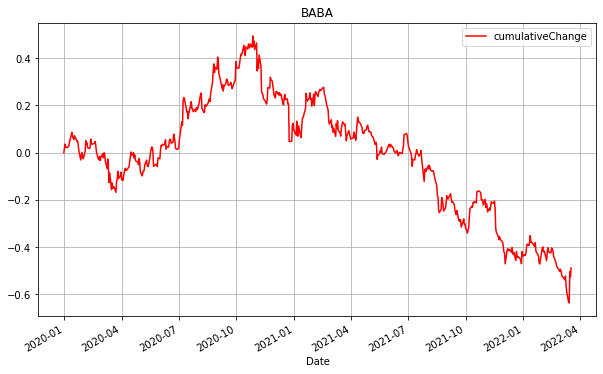

In [8]:
import matplotlib
%matplotlib inline 
matplotlib.rcParams['figure.figsize']=(10,6) 
babaDf["cumulativeChange"].plot(grid=True, c='r')   
# plt.plot(label='baba')
plt.title('BABA')
plt.legend()
plt.show()

#### 2.6 特征构建
自动构建

基于原特征构建一个特征子集来完全地表示数据（k<n），不是简单地删除一些列，而是对数据集应用复杂的数学变换。

常用技术：PCA（基因组合）、RFE、tSNE

#### 2.7 特征学习：以AI促AI
不依赖数学公式，尝试对数据进行理解和建模，从而发掘数据的模式并创建新数据。

基于神经网络的算法：
- 受限玻尔兹曼机（RBM）
- Word2vec/Glove等词嵌入算法